#### Introduction
This notebook will investigate the relationship between the GDP of a country with the life expectancy of its citizens.

Here are a few questions that this project will seek to answer:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

Data Sources:
- GDP Source: World Bank national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: World Health Organization

#### Importing Libraries

Before any data science activity is started python libraries useful in arriving at conclusions need to be imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the csv file into a dataframe called gdp_data
gdp_data = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/all_data.csv')

#Printing the head (first 5 rows) of the data
print(gdp_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#Printing the tail (last 5 rows) of the data
print(gdp_data.tail())

     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10


In [4]:
#Getting information on the dataset
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
#How many different countries are in the dataset?
num_countries = gdp_data['Country'].nunique()

#What are the countries?
countries = gdp_data['Country'].unique()

print('There are ' + str(num_countries) + ' in the dataset:')
print(countries)

There are 6 in the dataset:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


#### Data Cleaning

Even though the data is not too dirty, the column called 'Life expectancy at birth (years)' is obviously too long and needs to renamed to a shorter one. The GDP column values have a scientific representation, the values are in trillions. The column will be renamed to reflect such.

In [6]:
#Renaming the 'Life expectancy at birth (years)' column to LifeExp and GDP to GDP (Trillions)

gdp_data.rename(columns = {'Life expectancy at birth (years)' : 'LifeExp', 'GDP' : 'GDP (Trillions)'}, inplace = True)
gdp_data.head()

,Country,Year,LifeExp,GDP (Trillions)
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
#Recoding the values in GDP(Billions) for easy reading
#gdp_data['GDP (Trillions)'] = gdp_data.apply(lambda row: round(row['GDP (Trillions)']/1000000000000, 2), axis = 1)
gdp_data.head()

,Country,Year,LifeExp,GDP (Trillions)
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Data Exploration

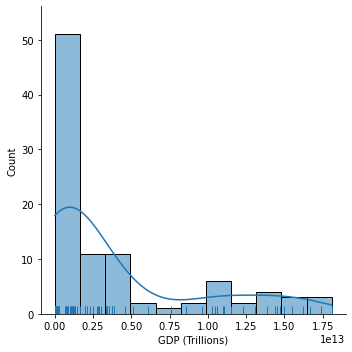

In [8]:
sns.displot(x = gdp_data['GDP (Trillions)'], rug = True, kde = True)
plt.show()

From the distribution above, it can be concluded that, the data is skewed to the right because majority of the data points fall to the left had side of the distribution.

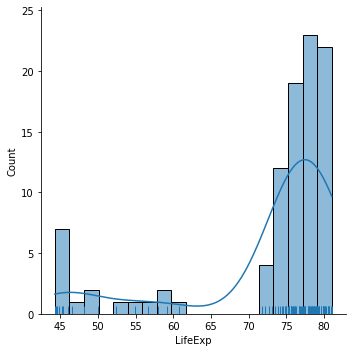

In [9]:
sns.displot(x = gdp_data['LifeExp'], rug = True, kde = True)
plt.show()

In [10]:
#Finding the average life expectancy and GDP of the countries 
means = gdp_data.drop('Year', axis = 1).groupby('Country').mean().reset_index()
means

,Country,LifeExp,GDP (Trillions)
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


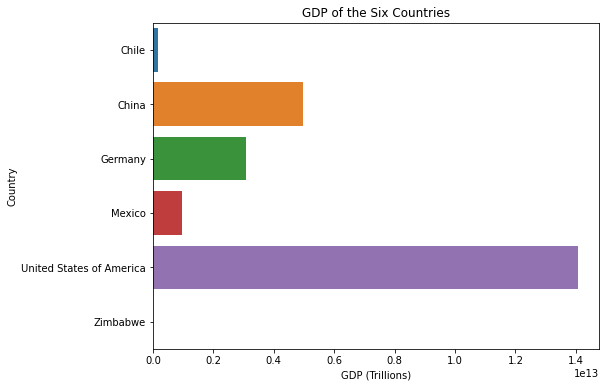

In [11]:
plt.figure(figsize = (8,6))
sns.barplot(data = means, x = 'GDP (Trillions)', y = 'Country')
plt.title('GDP of the Six Countries')
plt.show()

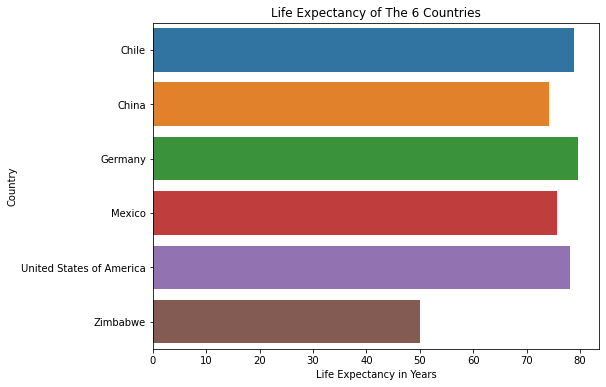

In [12]:
plt.figure(figsize = (8,6))
sns.barplot(data = means, x = 'LifeExp', y = 'Country')
plt.title('Life Expectancy of The 6 Countries')
plt.xlabel('Life Expectancy in Years')
plt.show()

AttributeError: 'FacetGrid' object has no attribute 'add_axis_labels'

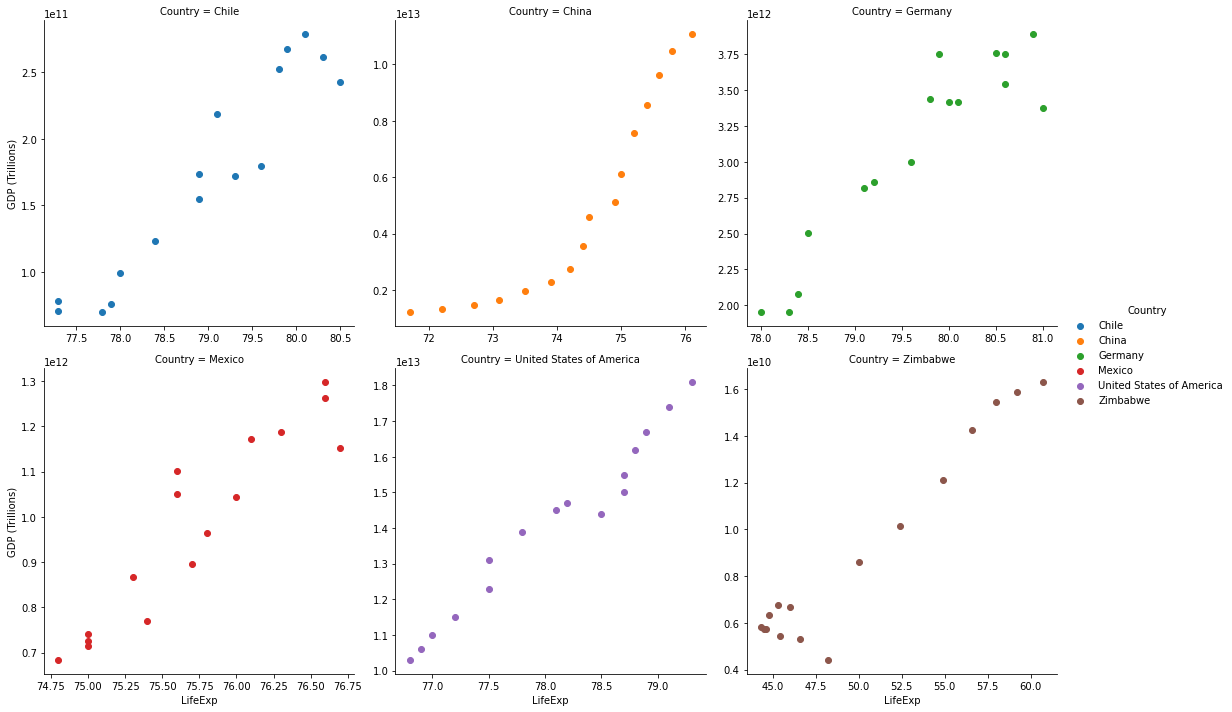

In [14]:
g = sns.FacetGrid(gdp_data, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = False, height = 5)
fig = g.map(plt.scatter, 'LifeExp', 'GDP (Trillions)')
fig.add_legend()
fig.add_axis_labels('Life Expectancy at birth (years)', 'GDP (Trillions)')
plt.show()